### Introduction:

Step 1: importing libraries and data

Step 2: Exploratory Data Analysis(EDA)

Step 3: Joining of datasets and Feature Engineering (Formed 2 new features from name of the product and one of price per unit)

Step 4: Finding Drivers of Sales and how each feature impacts sales

Step 5: Finding top and bottom products

Step 6: How to imporve Sales?


In [1]:
# import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# import data

purchase_data=pd.read_csv('QVI_purchase_behaviour.csv')
transaction_data=pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
# Exploring Data

purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
purchase_data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
LYLTY_CARD_NBR      72637 non-null int64
LIFESTAGE           72637 non-null object
PREMIUM_CUSTOMER    72637 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


-----> No null object found and data types are also consistent

In [6]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


----->No null object found and data types are also consistent

### Complete overview and exploration of purchase data

In [7]:
purchase_data.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [8]:
purchase_data['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [9]:
purchase_data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [10]:
## Finding exact number of customers with three categories of purchase data

for l in purchase_data['PREMIUM_CUSTOMER'].unique():
    print(purchase_data[purchase_data['PREMIUM_CUSTOMER'] == l].shape[0],l)

18922 Premium
29245 Mainstream
24470 Budget


### Complete overview and exploration of transaction data

In [11]:
transaction_data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

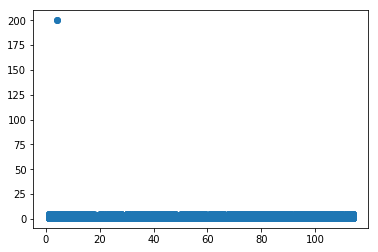

In [12]:
plt.scatter(transaction_data['PROD_NBR'],transaction_data['PROD_QTY'])

------->Located outlier in Product Quantity 

In [13]:
transaction_data[transaction_data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [14]:
purchase_data[purchase_data['LYLTY_CARD_NBR'] == 226000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
59694,226000,OLDER FAMILIES,Premium


It is probably a large family who have twice bought 200 products.But since it is only one customer we can remove this outlier, to get better picture of our analysis for other customers.

In [25]:
purchase_data=purchase_data.drop(index=59694).reset_index()
transaction_data=transaction_data.drop(index=[69762,69763]).reset_index()


### Joining of datasets

In [26]:
full_sales_data=purchase_data.merge(transaction_data,on='LYLTY_CARD_NBR',how='left')

In [27]:
full_sales_data=full_sales_data.drop(['index_x','index_y'],axis=1)

In [28]:
full_sales_data=full_sales_data.sort_values(by='DATE').reset_index(drop=True)

In [29]:
full_sales_data.head()

,level_0_x,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,level_0_y,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,8466,30109,OLDER FAMILIES,Budget,34842,43282,30,27159,66,CCs Nacho Cheese 175g,2,4.2
1,29240,107162,OLDER SINGLES/COUPLES,Premium,124889,43282,107,109257,15,Twisties Cheese 270g,2,9.2
2,72158,271083,YOUNG FAMILIES,Budget,203916,43282,271,268688,97,RRD Salt & Vinegar 165g,2,6.0
3,52575,197352,RETIREES,Premium,181323,43282,197,197323,18,Cheetos Chs & Bacon Balls 190g,2,6.6
4,52565,197341,YOUNG SINGLES/COUPLES,Mainstream,252874,43282,197,197303,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8


### Feature Engineering and EDA

In [30]:
full_sales_data.describe()

,level_0_x,LYLTY_CARD_NBR,level_0_y,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264828.000000,2.648280e+05,264828.000000,264828.000000,264828.000000,2.648280e+05,264828.000000,264828.000000,264828.000000
mean,36297.144679,1.355467e+05,132417.519077,43464.035004,135.077363,1.351556e+05,56.583447,1.905818,7.299345
std,20287.389568,8.057966e+04,76451.678043,105.389079,76.783714,7.813259e+04,32.826637,0.343431,2.527235
min,0.000000,1.000000e+03,0.000000,43282.000000,1.000000,1.000000e+00,1.000000,1.000000,1.500000
25%,19105.000000,7.002100e+04,66206.750000,43373.000000,70.000000,6.759875e+04,28.000000,2.000000,5.400000
50%,35598.000000,1.303560e+05,132419.500000,43464.000000,130.000000,1.351335e+05,56.000000,2.000000,7.400000
75%,54196.000000,2.030930e+05,198626.250000,43555.000000,203.000000,2.026952e+05,85.000000,2.000000,9.200000
max,72635.000000,2.373711e+06,264833.000000,43646.000000,272.000000,2.415841e+06,114.000000,5.000000,29.500000


In [31]:
test_array=np.array(full_sales_data['PROD_NAME'])

In [32]:
test_array

array(['CCs Nacho Cheese    175g', 'Twisties Cheese     270g',
       'RRD Salt & Vinegar  165g', ...,
       'Smiths Thinly       Swt Chli&S/Cream175G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g'], dtype=object)

In [33]:
## Get the weight feature

import re
for i in range(0,3550):
    full_sales_data.loc[i,'Weight']=re.findall(r'[0-9]{2,3}',test_array[i])

In [34]:
for i in range(0,3550):
    full_sales_data.loc[i,'Brand']=re.findall('^[^\s]+',test_array[i].lower())

In [35]:
full_sales_data['Brand'].head()

0         ccs
1    twisties
2         rrd
3     cheetos
4      kettle
Name: Brand, dtype: object

In [36]:
full_sales_data['Brand'].unique()

array(['ccs', 'twisties', 'rrd', 'cheetos', 'kettle', 'cobs', 'tostitos',
       'doritos', 'grain', 'red', 'natural', 'tyrrells', 'old', 'ncc',
       'pringles', 'sunbites', 'smith', 'infuzions', 'ww', 'smiths',
       'thins', 'cheezels', 'french', 'grnwves', 'burger', 'woolworths',
       'dorito', 'infzns', 'snbts', nan], dtype=object)

correction of spellings needed in some

In [37]:
full_sales_data['Brand']=full_sales_data['Brand'].map({'dorito':'doritos','smith':'smiths',
                                                                     'ncc':'ccs','red':'rrd','infzns':'infuzions',
                                                                    'grnwves':'grain'})

In [38]:
full_sales_data['Price/Product']= np.divide(full_sales_data['TOT_SALES'],full_sales_data['PROD_QTY'])

In [39]:
# Selecting initial part of data instead of random rows to keep DATE feature intact
# Why 3550? To keep full(almost) data upto DATE:43286 

test_data=full_sales_data.iloc[0:3550].reset_index(drop=True)

### Total Sales:

<Figure size 432x288 with 0 Axes>

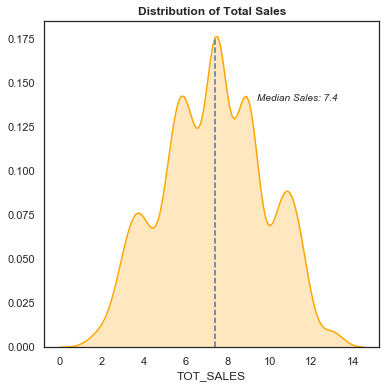

In [40]:
## Create Canvas
sns.set(style='white')
sns.despine(left=True)
plt.figure(figsize=(6,6))

# Create plot
sns.distplot(test_data['TOT_SALES'],hist=False,kde_kws={'shade':True},color='Orange')

# add vertical line
plt.axvline(test_data['TOT_SALES'].median(),
           ymax=0.95,linestyle='--')

# add text
plt.text(test_data['TOT_SALES'].median() + 2, 0.14,
         # Create text 
         'Median Sales: ' + str(test_data['TOT_SALES'].median()), 
         # Set text style
         fontsize = 10, 
         style = "italic")

#final touches
plt.title("Distribution of Total Sales",fontsize=12,fontweight='semibold')
plt.show()


### Investigating Drivers of Sales and Customer Segmentation:

In [41]:
df=test_data.pivot_table(index='PREMIUM_CUSTOMER', columns='LIFESTAGE', aggfunc={'TOT_SALES':sum}, dropna=False)
df['Total']=df.sum(axis=1)
df.loc['Total']=df.sum()

In [42]:
df.style.background_gradient(cmap='Blues')

In [43]:
df.style.background_gradient(cmap='Reds',axis=1)

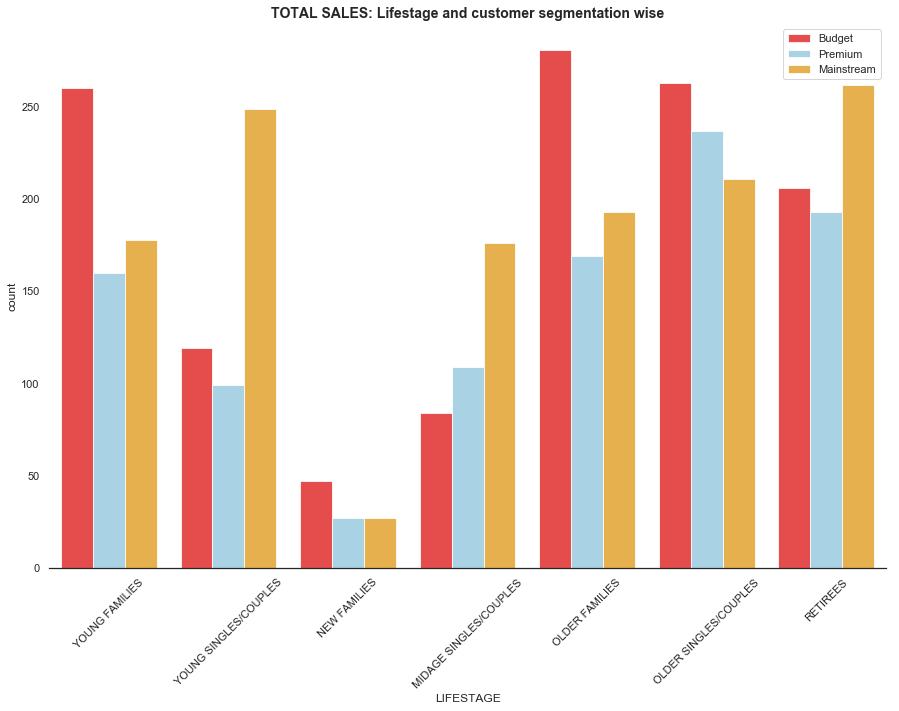

In [44]:
# Set initial plot options
sns.set_style('white')

# Create figure and axes
plt.figure(figsize=(15,10))

# Create plot 
sns.countplot(x='LIFESTAGE',
              # Group by 
              hue = 'PREMIUM_CUSTOMER', 
              data=test_data,
              order=['YOUNG FAMILIES','YOUNG SINGLES/COUPLES',"NEW FAMILIES","MIDAGE SINGLES/COUPLES",'OLDER FAMILIES',
                    'OLDER SINGLES/COUPLES','RETIREES'],
              # Set colour of hue and transperency
              palette = ["red","skyblue",'orange'],
              alpha = 0.8)


# Despine visualizations
sns.despine(left = True)
# Figure final formatting 
plt.xticks(rotation=45)
plt.title('TOTAL SALES: Lifestage and customer segmentation wise', fontsize = 14, fontweight = "semibold")
plt.legend(loc='best')
plt.show()

__OLDER SINGLES/COUPLES: Highest in Premium Segment__

__Retirees: Highest in Mainstream Segment__

__OLDER FAMILIES: Highest in Budget Segement__

### Size of Packet/Weight:

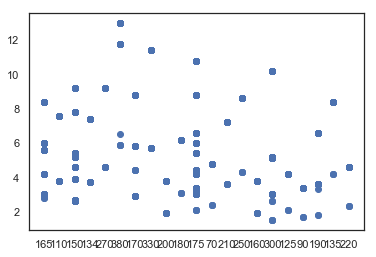

In [120]:
plt.scatter(test_data['Weight'],test_data['TOT_SALES'])

In [121]:
df_weight=pd.DataFrame(test_data.groupby('Weight')['TOT_SALES'].sum().sort_values())

In [122]:
df_weight=df_weight.reset_index()

In [123]:
df_weight.Weight=df_weight.Weight.astype('float')

In [124]:
df_weight[df_weight['TOT_SALES'] > df_weight['TOT_SALES'].quantile(q=0.80) ].Weight.mean()

142.25

### Store-wise Sales

In [125]:
store_wise_sales=pd.DataFrame(test_data.groupby(by=['STORE_NBR'])['TOT_SALES'].sum())
store_wise_sales.head()

,TOT_SALES
STORE_NBR,
1,28.1
2,51.9
3,220.8
4,278.9
5,138.8


In [126]:
store_wise_sales.quantile(0.95)

TOT_SALES    218.2
Name: 0.95, dtype: float64

In [127]:
# Stores with top 5% sales
top_stores=store_wise_sales[store_wise_sales['TOT_SALES'] > 218.2].reset_index()
top_stores

,STORE_NBR,TOT_SALES
0,3,220.8
1,4,278.9
2,40,246.4
3,58,338.0
4,60,222.8
5,79,231.1
6,123,238.4
7,133,222.4
8,165,290.2
9,166,220.3


In [128]:
store_wise_sales.quantile(0.05)

TOT_SALES    12.95
Name: 0.05, dtype: float64

In [129]:
#stores with bottom 5 % sales
bottom_stores=store_wise_sales[store_wise_sales['TOT_SALES'] < 12.95].reset_index()
bottom_stores

,STORE_NBR,TOT_SALES
0,14,3.4
1,16,6.4
2,44,9.2
3,85,10.9
4,99,6.3
5,127,8.8
6,131,12.9
7,139,5.3
8,158,5.2
9,159,5.4


### Date and total Sales:

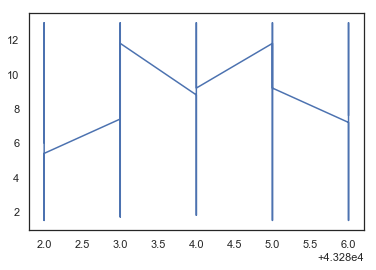

In [130]:
plt.plot(test_data['DATE'],test_data['TOT_SALES'])

This is because Excel stores dates as sequential serial numbers, so that they can be used in calculations. By default, January 1, 1900, is serial number 1, and July 1, 2018, is serial number 43282 (indicating the number of days since 1/1/1900).

### Product wise Sales:

In [132]:
# get top and bottom products

top_10_prod=pd.DataFrame(test_data.groupby('Brand')['TOT_SALES'].sum().sort_values()[-10:])
bot_10_prod=pd.DataFrame(test_data.groupby('Brand')['TOT_SALES'].sum().sort_values()[0:10])
top_10_prod

,TOT_SALES
Brand,
ccs,84.0
grain,111.6
smiths,247.0
infuzions,262.2
rrd,437.4
doritos,474.5


In [133]:
store_cross_product_df=pd.DataFrame(test_data.groupby(['STORE_NBR','Brand'])['TOT_SALES'].sum()).sort_values(
    ['STORE_NBR','TOT_SALES'],ascending=[True,False])

In [134]:
store_cross_product_df.head()

TOT_SALES
STORE_NBR Brand               
2         smiths           2.6
5         doritos         13.0
          smiths           5.2
7         infuzions        7.6
8         doritos         13.0

In [135]:
idx=pd.IndexSlice

In [136]:
top_varr=store_cross_product_df.loc[idx[top_stores.index,:],:]

In [137]:
top_products_top_stores=top_varr.groupby('Brand').sum().sort_values(by='TOT_SALES',ascending=False).reset_index()

In [138]:
top_products_top_stores.head()

,Brand,TOT_SALES
0,doritos,26.0
1,smiths,13.0
2,infuzions,7.6


Text(0.5, 1.0, 'TOP Brands at TOP Stores')

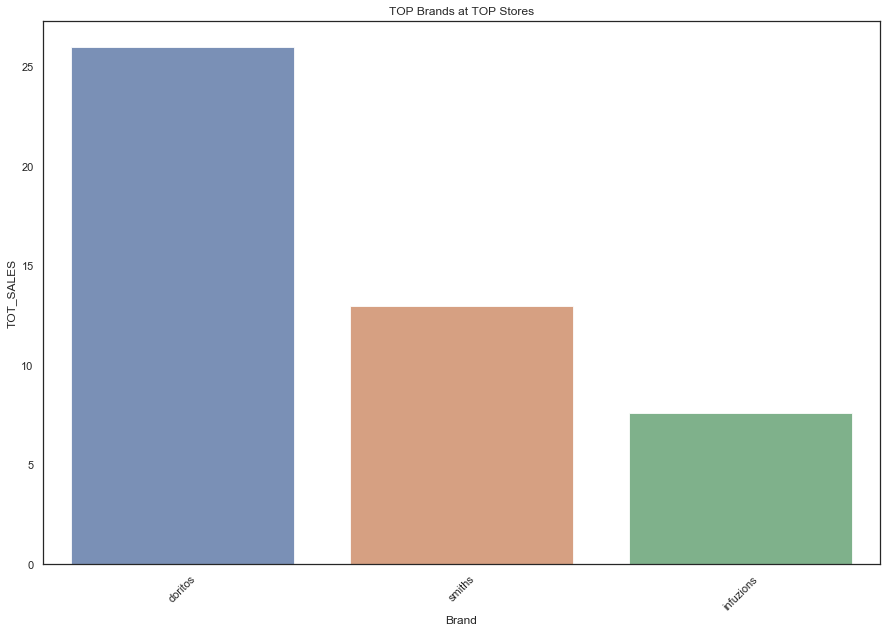

In [141]:
# Set initial plot options
sns.set_style('white')

# Create figure and axes
plt.figure(figsize=(15,10))

# Create plot 
sns.barplot(x='Brand',y='TOT_SALES',
              # Group by  
              data=top_products_top_stores[0:10],
              # Set colour of hue and transperency
              alpha = 0.8)

plt.xticks(rotation=45)
plt.title('TOP Brands at TOP Stores',fontweight=12)

In [142]:
bottom_varr=store_cross_product_df.loc[idx[bottom_stores.index,:],:]

In [143]:
top_products_bottom_stores=bottom_varr.groupby('Brand').sum().sort_values(by='TOT_SALES',ascending=False).reset_index()

In [144]:
top_products_bottom_stores

,Brand,TOT_SALES
0,doritos,26.0
1,smiths,13.0
2,infuzions,7.6


### How to improve sales?

1. Inspect the problem in bottom stores

In [145]:
bottom_Stores_data=test_data.loc[test_data['STORE_NBR'].apply(lambda x: x in list(bottom_stores.STORE_NBR))]

In [146]:
bottom_Stores_data=bottom_Stores_data.reset_index(drop=True)

In [147]:
top_Stores_data=test_data.loc[test_data['STORE_NBR'].apply(lambda x: x in list(top_stores.STORE_NBR))]

In [148]:
top_Stores_data=top_Stores_data.reset_index(drop=True)

In [149]:
bottom_Stores_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Product Name,Price/Product,Brand
0,189381,OLDER FAMILIES,Mainstream,43282,189,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,grnwves,3.1,grain
1,16358,OLDER SINGLES/COUPLES,Mainstream,43282,16,14491,34,Pringles Slt Vingar 134g,1,3.7,134,pringles,3.7,NaN
2,131000,YOUNG FAMILIES,Premium,43282,131,135315,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,110,infuzions,3.8,NaN
3,139410,YOUNG FAMILIES,Premium,43282,139,142133,76,Woolworths Medium Salsa 300g,1,1.5,300,woolworths,1.5,NaN
4,127031,YOUNG SINGLES/COUPLES,Budget,43283,127,130402,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,170,smiths,2.9,NaN


In [157]:
top_Stores_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

PREMIUM_CUSTOMER
Budget        1115.5
Mainstream    1187.3
Premium        905.9
Name: TOT_SALES, dtype: float64

In [158]:
bottom_Stores_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

PREMIUM_CUSTOMER
Budget        33.4
Mainstream    25.9
Premium       43.4
Name: TOT_SALES, dtype: float64

#### Point 2-----> Mainstream Customers are main buyers of top stores while they are last in terms of buying at bottom stores and we also know from above GROUPED BAR GRAPH that highest sales of MainStream Customers are mainly from RETIREES GROUP. So, target RETIREES around bottom stores.

In [160]:
test_data[test_data['PREMIUM_CUSTOMER'] == 'Mainstream'].groupby('Brand')['TOT_SALES'].sum().sort_values(ascending=False)[0:5]

Brand
rrd          151.2
doritos      104.0
smiths        93.6
infuzions     64.6
grain         46.5
Name: TOT_SALES, dtype: float64

#### Point 3----> These are the top 5 favourite products in Mainstream customers according to sales. Focus on these products to increase the sales of Mainstream customers in bottom stores